In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [9]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
# Map target values to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [13]:
# View first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [14]:
# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


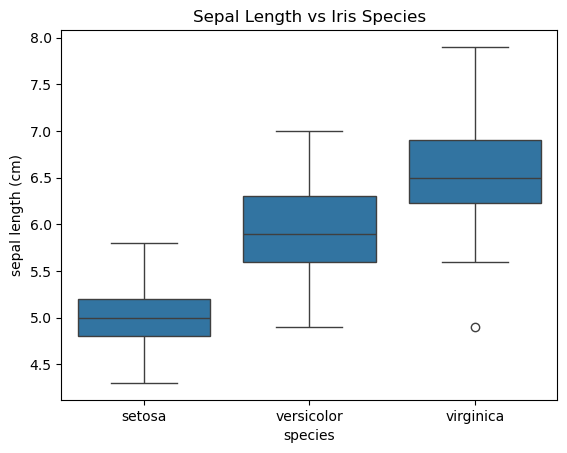

In [15]:
# Visualize sepal length vs species
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Sepal Length vs Iris Species')
plt.show()

In [16]:
# Encode target variable
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

In [17]:
# View first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  species_encoded  
0  setosa                0  
1  setosa                0  
2  setosa                0  
3  setosa                0  
4  setosa                0  


In [18]:
# Separate features and target
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species_encoded']

In [19]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [22]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [23]:
# Predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)

In [24]:
# Return predictions
print("Predictions:", y_pred)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [25]:
# Classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [26]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
#Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}


In [29]:
# Grid search
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [30]:
# Best parameters
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [32]:
# Train the optimized model
optimized_model = grid.best_estimator_
optimized_model.fit(X_train, y_train)

SVC(C=1, probability=True)

In [33]:
# Evaluate the optimized model
y_pred_optimized = optimized_model.predict(X_test)
print("\nOptimized Model Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Optimized Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
# Step 5: Prediction and Metrics (AUC & ROC Curve)
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [36]:
# Binarize output for AUC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = svm_model.predict_proba(X_test)

In [37]:
# Calculate AUC (macro average)
roc_auc = roc_auc_score(y_test_bin, y_score, average='macro')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


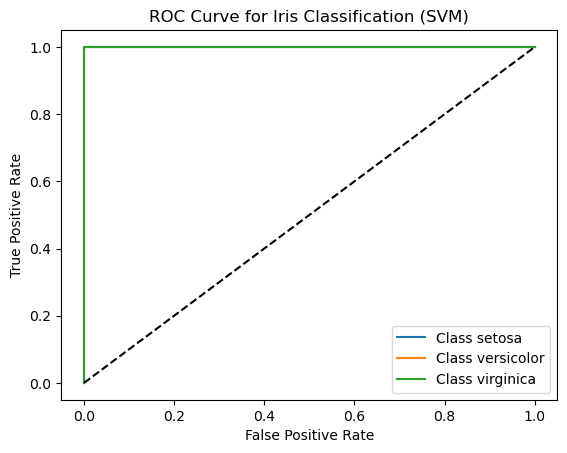

In [38]:
# Plot ROC Curve for each class
fpr = {}
tpr = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Iris Classification (SVM)")
plt.legend()
plt.show()